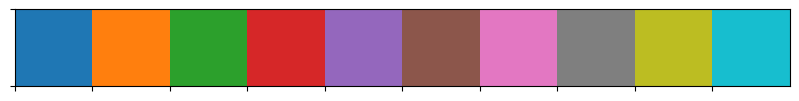

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
import skrf as rf
from IPython.display import HTML


%matplotlib inline
plt.style.use('default')
plt.style.use('seaborn-paper')
current_palette = sns.color_palette(palette=None)
sns.set_palette(palette=None)
sns.palplot(current_palette)

mpl.rcParams.update({'figure.figsize': (5, 3)})
mpl.rcParams['figure.dpi']= 150

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [51]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code Here"></form>''')

##  Receiver Design


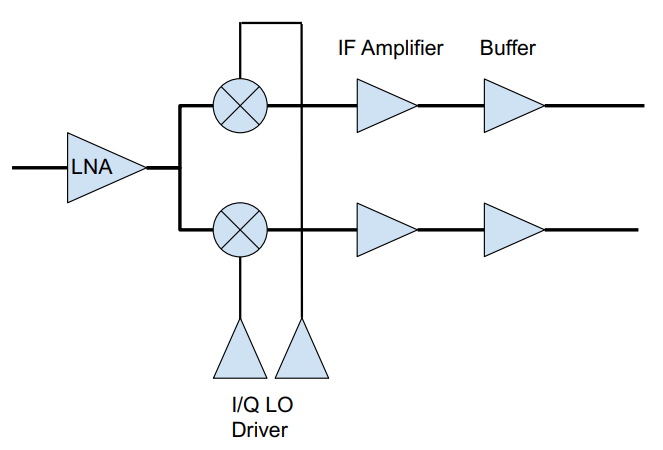

### Architecture
- The sliding IF translates with the same LO freq. This is for the frequency planning. Learn how the plan is done.
- Architecture is without an image reject filter. The LNA selectivity aleviates the issue of having image noise. 
- It should be noted that the simulation is actually already at 10K (For the parasitics). The active devices are left alone at 27 degrees.
- The IIP3 is observed to be -46.61 dBm
- The IIP2 is seen to be -23.28 dBm
- The power consumption of the whole receiver is seen to be 73mW 
- Gain is comparable to cryogenic receiver used by astronomy ~60dB
- Noise temperature on the otherhand is out of phase even for cryogenic performance.

### LNA
- Typical CS stage with emitter degeneration
- Two stages:
    - First one is a degenerate CS stage, transformer to matched the single ended input. A center tapped transformer is used to make single ended signal to differential signal.
    - Second stage is a differential gain stage to amplify it more.
- Output of diff. stage goes to a center tapped transformer which matches the input impedance of the mixer.
- Cascode stages, reverse isolation is better, reduces the LO leakage problem.
- The input transformer is 1:1


### Mixer
- LO frequencies of 6 GHz, downconvert to 1 GHz, bandwidth of signal is 2 GHz (6-8 GHz)
- Bleeding mixer topology double balance mixer.
- IF amplifier to add more gain to the system. 
- A buffer to match to 50 ohm so you can measure them. This done by biasing the transistor properly ($R_L || gmr_or_0$)
- Consideration of maximum I and Q mismatch that can tolerate downconverted signal.


Noise figure wise, the system tends to be better at lower LO frequency. The noise folding of the mirrored noise overlaps at DC. Hence a higher noise figure is seen at closer to DC. Additionally, 1/F noise adds to this noise. Hence an optimum frequency is required. 

### IF amplifier and IF Buffer
- IF amplifier is used to get more additional gain. 

### LO Buffer
- LO buffer is used to impededance match the LO driver to the mixer switches. Mixer 

### Cadence Notes
- To set to the original without parasitics by choosing the schematics in the config file.
- A direct conversion architecture emits a fraction of it's LO power back to the measurement qubits with LO leakage.
- LO leakage also happens in heterodyne. But we can tune it in a way that it falls outside the qubit range.
- LO Leakage can lead to self mixing --> when the LO leaks can goes back to the mixer putting it in DC.

### 12/08/2019 Meeting
- <s>Make sure that you know if it is DSB/SSB spectrum of the mixer, if IF usually it is SSB.</s>
- <s>NF Plot the noise power density. See if it is noise folding dominant or simply just 1/f </s>
- Out of band behaviour and In band behaviour
- <s>Watch where the DC paths are and where the AC paths are. (i.e C_AC and inductors etc)</s>
- Find out what happens when F_LO is 7 GHz, to see whether it is noise folding dominant or just 1/f.  Then plot the noise density
- <s>Find the behaviour of the 40nm technology node for the noise behaviour and gain with different sizes. Start with what Milad uses. Follow the RF course method, start with minimum size and make it bigger if more gain is required.</s>
- <s>Essentially completely redesign the LNA by yourself and how it compares to Milad's design.</s>
- Plot the noise figure and noise circle of the interstage matching. See if it is power match or noise match.
- Why 2 mixers with instead of 1 mixer wouldnt that be better?

### Graphs
- The slope is 209dB/dec ==> 10th ish order. the slope after the lna stg2 is approximately the same.



### 22/08/2019 Meeting
- <s>Figure out wideband matching with transformer. Find analytically the input output mechanism. See what impedance the input is seeing. See the gain transfer function.</s>
- Plot the Yopt and Z* of the single transistor
- <s>Extend the RX mixer sweep to 10^3 Hz too. Just so to confirm the bandwidth of the noise profile. </s>
- <s>Then try to understand the slope, where the poles and zeroes are in the system. </s>
- <s>Fix the LNA then for the design. Understand how the poles are put. </s>
- Find out how SSB to DSB by formula. Find the formulas.
- Check for the hybrid coupler. If not clear, ask Milad.
- <s>Figure out schematic simulation view. Without the layout. </s>

###  2/09/2019 Meeting
- Finish up the LNA Then we can move on to mixer
- Find the noise source contribution of ALL the sources to the output? 
- <s>Find out the design procedure of two coupled resonator. </s>
- finish up last week work too. Due on monday. 

# Receiver Chain


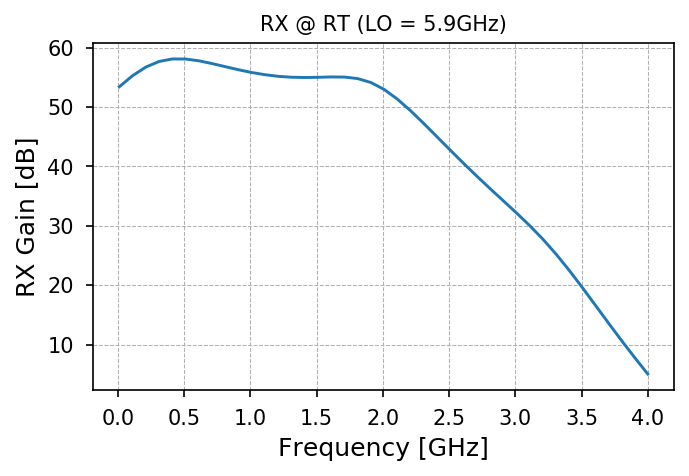

         NFdsb X   NFdsb Y  noise figure X  noise figure Y
0   1.000000e+08  2.763240    1.000000e+08        4.223360
1   1.258925e+08  2.747683    1.258925e+08        3.945012
2   1.584893e+08  2.725774    1.584893e+08        3.657260
3   1.995262e+08  2.697142    1.995262e+08        3.378006
4   2.511886e+08  2.662026    2.511886e+08        3.126621
5   3.162278e+08  2.622855    3.162278e+08        2.919153
6   3.981072e+08  2.583985    3.981072e+08        2.762294
7   5.011872e+08  2.550637    5.011872e+08        2.653401
8   6.309573e+08  2.529075    6.309573e+08        2.585901
9   7.943282e+08  2.526899    7.943282e+08        2.556167
10  1.000000e+09  2.555261    1.000000e+09        2.568281
11  1.258925e+09  2.632566    1.258925e+09        2.636989
12  1.584893e+09  2.795893    1.584893e+09        2.796909
13  2.000000e+09  3.146302    2.000000e+09        3.146596


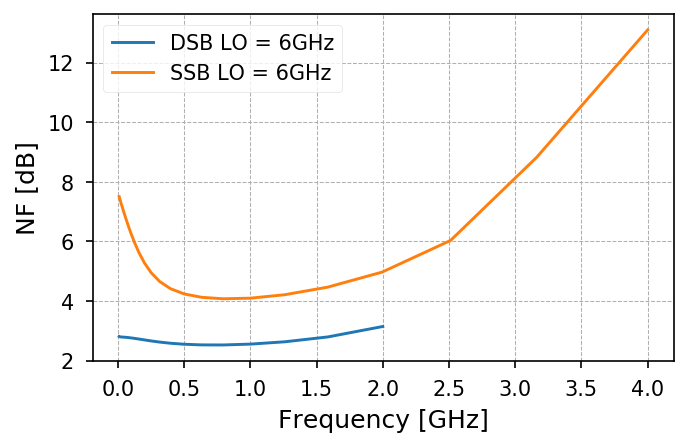

No handles with labels found to put in legend.


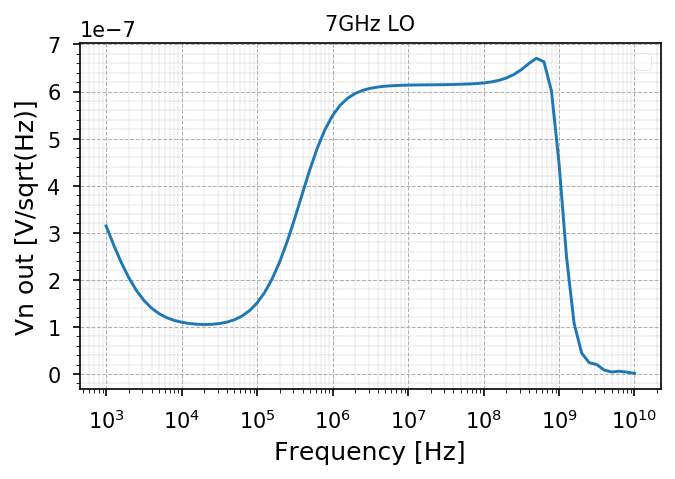

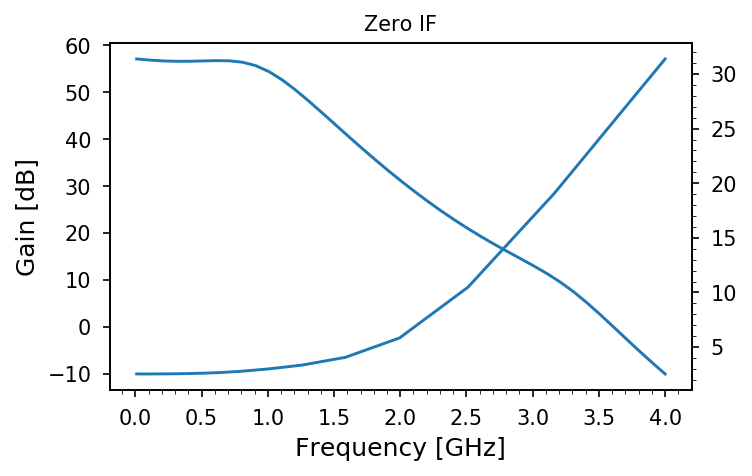

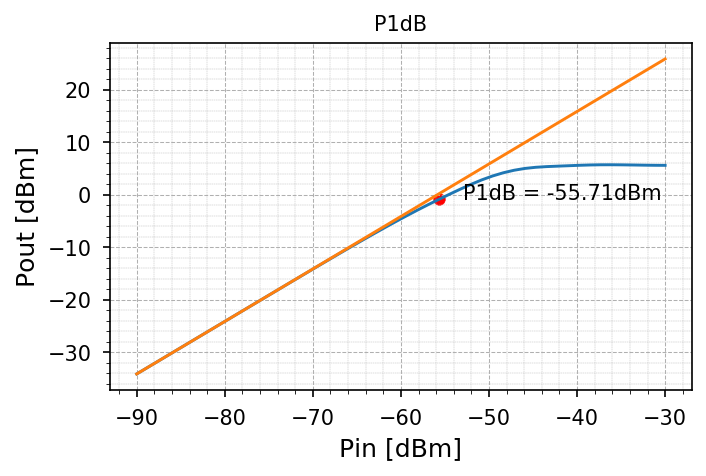

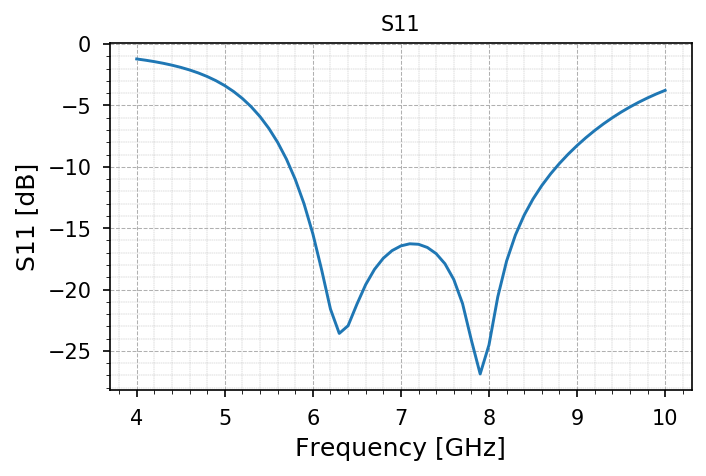

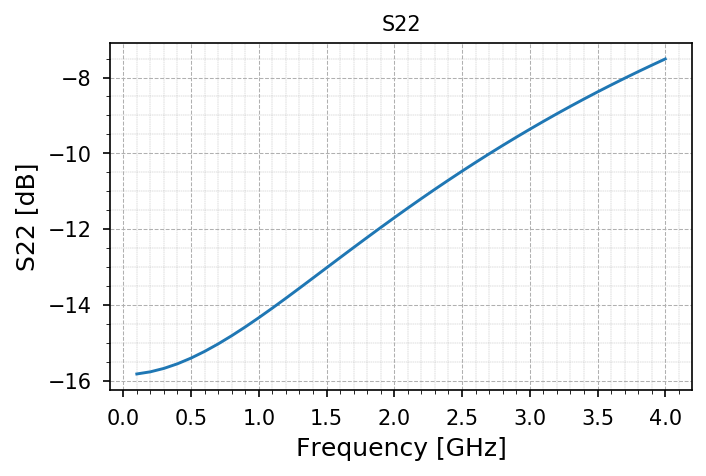

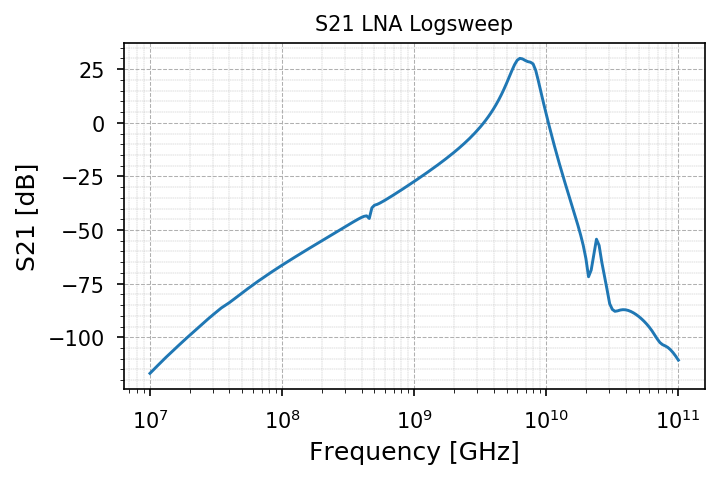

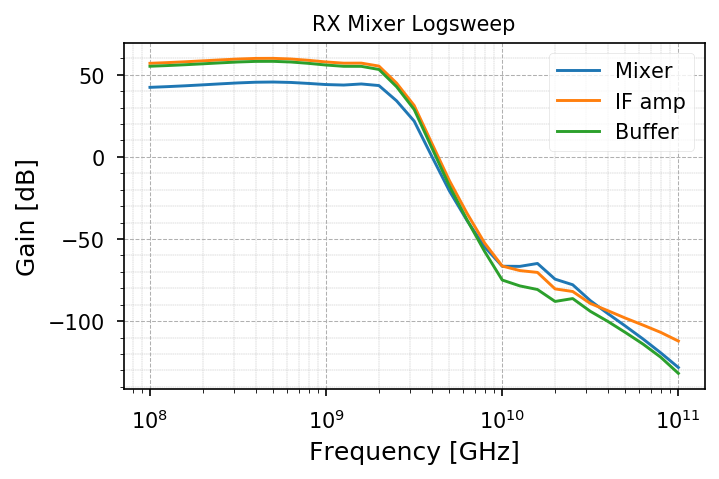

In [7]:

## NF from Small Signal AC analysis

# df_NF = pd.read_csv('Data/Preliminary_Data/NF_plot-dB.csv',sep=',')
# freq = df_NF['ac_NF (fin1=7e+09) X'] 
# NF = df_NF['ac_NF (fin1=7e+09) Y']
# plt.plot(freq, NF)
# plt.show()


## NF PLOT receiver output ############################################################################################

# Receiver downconverted signal
df_Vout_RT_6GHZ_LO = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LO_Sweep/Vout_receiver_6GHZ_LO_dB.csv',sep=',')
df_Vout_RT_6_2GHZ_LO = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LO_Sweep/Vout_receiver_6_2GHZ_LO_dB.csv',sep=',')
df_Vout_RT_5_8GHZ_LO = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LO_Sweep/Vout_receiver_5_8GHZ_LO_dB.csv',sep=',')


# Gain downconverted signal
df_NF_RT_6GHZ_LO = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LO_Sweep/NF_receiver_6GHZ_LO.csv',sep=',')
df_NF_RT_6_2GHZ_LO = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LO_Sweep/NF_receiver_6_2GHZ_LO.csv',sep=',')
df_NF_RT_5_8GHZ_LO = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LO_Sweep/NF_receiver_5_8GHZ_LO.csv',sep=',')

# SSB Noise
df_NFssb_6GHZ_LO = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LO_Sweep/NFssb_Rx_6GHZ_LO.csv',sep=',')
df_NFssb_5_8GHZ_LO = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LO_Sweep/NFssb_Rx_5_8GHZ_LO.csv',sep=',')
df_NFssb_6_2GHZ_LO = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LO_Sweep/NFssb_Rx_6_2GHZ_LO.csv',sep=',')





plt.plot(df_Vout_RT_6GHZ_LO['pac_vo_diff_I_mixer_dB (fin1=7e+09) X']/10**9, df_Vout_RT_6GHZ_LO['pac_vo_diff_I_mixer_dB (fin1=7e+09) Y'], label='LO = 5.9GHz')



plt.xlabel('Frequency [GHz]')
plt.ylabel('RX Gain [dB]')
# plt.legend()
plt.title('RX @ RT (LO = 5.9GHz)')
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


## NF comparison ################################################################################################

# plt.plot(df_NF_RT_5_8GHZ_LO['pnoise_F (fin1=7e+09) X']/10**9, 10*np.log10(df_NF_RT_5_8GHZ_LO['pnoise_F (fin1=7e+09) Y']), label = 'DSB LO = 5.8GHz')
plt.plot(df_NF_RT_6GHZ_LO['pnoise_F (fin1=7e+09) X']/10**9, 10*np.log10(df_NF_RT_6GHZ_LO['pnoise_F (fin1=7e+09) Y']), label = 'DSB LO = 6GHz')
# plt.plot(df_NF_RT_6_2GHZ_LO['pnoise_F (fin1=7e+09) X']/10**9, 10*np.log10(df_NF_RT_6_2GHZ_LO['pnoise_F (fin1=7e+09) Y']), label = 'DSB LO = 6.2GHz')

# plt.plot(df_NFssb_5_8GHZ_LO['pnoise_Fssb_dB (LO_fLO=5.8e+09) X']/10**9, df_NFssb_5_8GHZ_LO['pnoise_Fssb_dB (LO_fLO=5.8e+09) Y'], label = 'SSB LO = 5.8GHz')
plt.plot(df_NFssb_6GHZ_LO['pnoise_Fssb_dB (LO_fLO=6e+09) X']/10**9, df_NFssb_6GHZ_LO['pnoise_Fssb_dB (LO_fLO=6e+09) Y'], label = 'SSB LO = 6GHz')
# plt.plot(df_NFssb_6_2GHZ_LO['pnoise_Fssb_dB (LO_fLO=6.2e+09) X']/10**9, df_NFssb_6_2GHZ_LO['pnoise_Fssb_dB (LO_fLO=6.2e+09) Y'], label = 'SSB LO = 6.2GHz')

# plt.xlabel('Frequency [GHz]')
# plt.ylabel('NF SSB[dB]')
# plt.title('DSB vs SSB NF')
# plt.minorticks_on()
# plt.xlim(0,2)
# plt.ylim(2,8)
# plt.legend()
# plt.grid(which='major', linestyle='--', linewidth=0.5)
# plt.grid(which='minor', linestyle='--', linewidth=0.2)
# plt.show()


# df_NFs = pd.read_csv('Data/New_RT_data/RT_NFs.csv',sep=',')
# print(df_NFs)

# plt.plot(df_NFs['NFdsb X'], df_NFs['NFdsb Y'], label='DSB')
# plt.plot(df_NFs['noise figure X'], df_NFs['noise figure Y'], label='SSB')
plt.xlabel('Frequency [GHz]')
plt.ylabel('NF [dB]')
plt.legend()
# plt.title('RX @ RT (LO = 5.9GHz)')
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()
                                          
## Vnout  #################################################################################################
# df_Vno_RX = pd.read_csv('Data/Cad_sim_data/Receiver_RT/Vn_out_RX.csv',sep=',')
df_Vno_RX_7GHz = pd.read_csv('Data/Cad_sim_data/Receiver_RT/pnoise_output_RX.csv',sep=',')


# plt.semilogx(df_Vno_RX['output noise; V/sqrt(Hz) X'], df_Vno_RX['output noise; V/sqrt(Hz) Y'])
plt.semilogx(df_Vno_RX_7GHz['output noise; V/sqrt(Hz) (fin1=7e+09) X'], df_Vno_RX_7GHz['output noise; V/sqrt(Hz) (fin1=7e+09) Y'])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Vn out [V/sqrt(Hz)]')
plt.title('7GHz LO')
plt.minorticks_on()
plt.legend()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


# Zero IF Plot #################################################################################################
df_Vout_ZIF = pd.read_csv('Data/Cad_sim_data/Receiver_RT/Gain_RX_zero_IF.csv',sep=',')
df_NF_RXdsb = pd.read_csv('Data/Cad_sim_data/Receiver_RT/NF_RXdsb.csv',sep=',')

fig, ax1 = plt.subplots()


ax1.plot(df_Vout_ZIF['pac_vo_diff_I_mixer_dB (fin1=7e+09) X']/10**9, df_Vout_ZIF['pac_vo_diff_I_mixer_dB (fin1=7e+09) Y'])
ax2 = ax1.twinx()
ax2.plot(df_NF_RXdsb['pnoise_Fdsb_dB (fin1=7e+09) X']/10**9, df_NF_RXdsb['pnoise_Fdsb_dB (fin1=7e+09) Y'])

ax1.set_xlabel('Frequency [GHz]')
# ax2.set_ylabel('NF [dB]')
ax1.set_ylabel('Gain [dB]')
plt.title('Zero IF')
plt.minorticks_on()
plt.show()

## P1dB plot ###################################################################################################

df_vout_vin = pd.read_csv('Data/Preliminary_Data/pss_vout_vin_I_pcb.csv',sep=',')
vin = 10 + 20*np.log10(df_vout_vin['pss_vout_I_pcb (fin1=7e+09) X'])
vout = 10 + 20*np.log10(df_vout_vin['pss_vout_I_pcb (fin1=7e+09) Y'])

new_length = 50
new_vin = np.linspace(vin.min(), vin.max(), new_length)
new_vout = sp.interpolate.interp1d(vin, vout, kind='cubic')(new_vin)

m = (new_vout[10] - new_vout[1]) / (new_vin[10] - new_vin[1])
c = new_vout[10] - new_vin[10]*m

p1db_interpolate = m*new_vin + c

diff_p1db = p1db_interpolate - new_vout

p1dB = new_vin[28] #p1dB where it crosses 1db difference
# print(p1dB)


plt.plot(new_vin, new_vout)
plt.plot(new_vin, p1db_interpolate)
plt.scatter(new_vin[28], new_vout[28], color='r')
plt.text(new_vin[28]*(1-0.05), new_vout[28]*(1-0.05) , 'P1dB = -55.71dBm ', fontsize=10)
plt.xlabel('Pin [dBm]')
plt.ylabel('Pout [dBm]')
plt.title('P1dB')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()



## S11 Param #######################################################################################################
df_s11 = pd.read_csv('Data/Preliminary_Data/S11_Param.csv',sep=',')
freq_s11_GHz = df_s11['sp_S11 (fin1=7e+09) X']/10**9
s11 = df_s11['sp_S11 (fin1=7e+09) Y']


plt.plot(freq_s11_GHz,s11)
plt.xlabel('Frequency [GHz]')
plt.ylabel('S11 [dB]')
plt.title('S11')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

## S22 Param ######################################################################################################

df_s22 = pd.read_csv('Data/Preliminary_Data/S22_Param.csv',sep=',')
freq_s22_GHz = df_s22['S22 dB20 X']/10**9
s22 = df_s22['S22 dB20 Y']

plt.plot(freq_s22_GHz,s22)
plt.xlabel('Frequency [GHz]')
plt.ylabel('S22 [dB]')
plt.title('S22')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

## LNA s21 ######################################################################################################

df_LNA_logsweep = pd.read_csv('Data/Cad_sim_data/Receiver_RT/LNA_S21_logsweep.csv',sep=',')

plt.semilogx(df_LNA_logsweep['sp_S21_dB (pin=-50) X'], df_LNA_logsweep['sp_S21_dB (pin=-50) Y'])

plt.xlabel('Frequency [GHz]')
plt.ylabel('S21 [dB]')
plt.title('S21 LNA Logsweep')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

## RX Chain ######################################################################################################

df_logsweep_mixer = pd.read_csv('Data/Cad_sim_data/Receiver_RT/pac_logsweep_I_mixer.csv',sep=',')
df_logsweep_IF = pd.read_csv('Data/Cad_sim_data/Receiver_RT/pac_logsweep_I_IFamp.csv',sep=',')
df_logsweep_buff = pd.read_csv('Data/Cad_sim_data/Receiver_RT/pac_logsweep_I_buff.csv',sep=',')

plt.semilogx(df_logsweep_mixer['pac_vo_diff_I_mixer_dB (fin1=7e+09) X'], df_logsweep_mixer['pac_vo_diff_I_mixer_dB (fin1=7e+09) Y'], label='Mixer')
plt.semilogx(df_logsweep_IF['pac_vo_diff_I_IF_STG1_dB (fin1=7e+09) X'], df_logsweep_IF['pac_vo_diff_I_IF_STG1_dB (fin1=7e+09) Y'], label='IF amp')
plt.semilogx(df_logsweep_buff['pac_vo_diff_I_pcb_dB (fin1=7e+09) X'], df_logsweep_buff['pac_vo_diff_I_pcb_dB (fin1=7e+09) Y'], label='Buffer')


plt.xlabel('Frequency [GHz]')
plt.ylabel('Gain [dB]')
plt.title('RX Mixer Logsweep')
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()



## LNA - Design

The LNA comprises of two stages. The first stage focuses on the noise and impedance matching. The second stage on the otherhand amplifies the signal further by approximately 12dB.

$$Z_{in} = \frac{gm L_s}{C_{gs}} + R_b + j\left(\omega L_{s} - \frac{1}{\omega C_{gs}}\right)$$ 


The first stage is designed as a CS stage with an inductive degeneration. An inductor of 162pH was used for this purpose. A 3:4 transformer is then used for impedance matching towards the 50 ohm source. An additional cascode transistor is used for amplification purposes and also for isolation purposes (Which helps with stability). The first stage is terminated by a balun to convert the single ended signal ended signal to a differential signal. The center tap of the output is biased as required by the differential transistors of the second stage. Furthermore, the balun functions as an interstage matching. Additional capacitance load capacitance is seen at the output of the 


The second stage is based on a cascoded differential amplifier. A transformer 1:2 transformer is used for interstage matching purposes to drive the mixer. 


The IP3 and IP2 of the LNA is calculated by interpolation. 
$$ IIP_{n} = P_{in} + \frac{\Delta P}{n-1}  $$
From this formula, it is observed that:
- IP3 = -16.07 dBm
- IP2 = 7.38 dBm

The power usage of the LNA is observed to be approximately 25mW. Significantly lower than the noise cancelling design as expected. But of course higher noise figure is observed in this iteration. 

D:\Programs\Anaconda\lib\site-packages\skrf\io\touchstone.py:233: RuntimeWarning: invalid value encountered in sign
  pos = numpy.where(numpy.sign(numpy.diff(values[::9])) == -1)


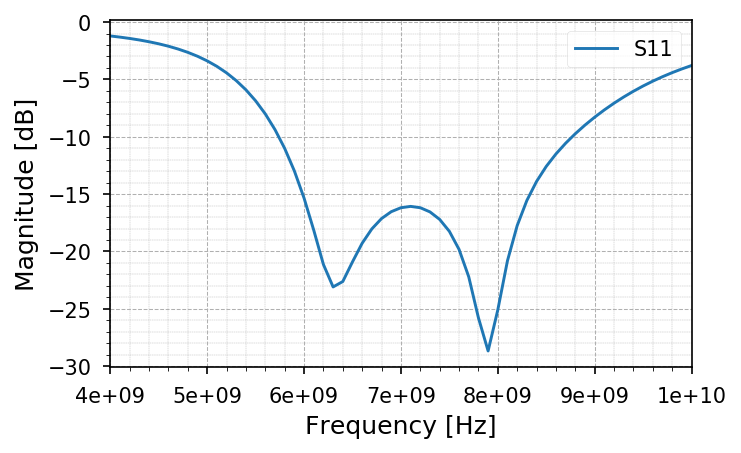

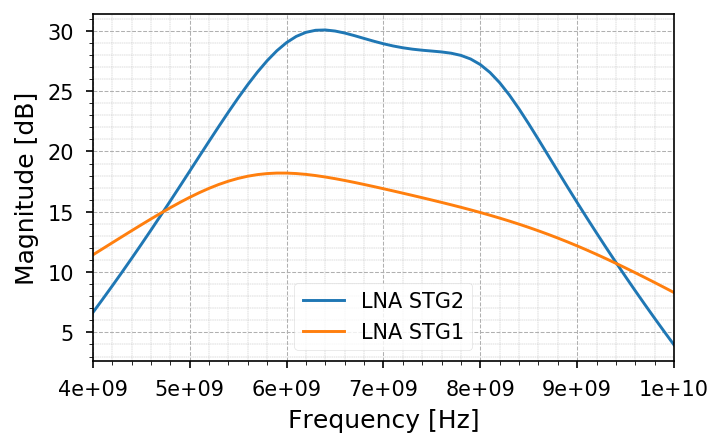

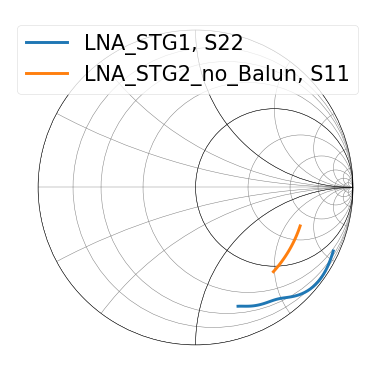

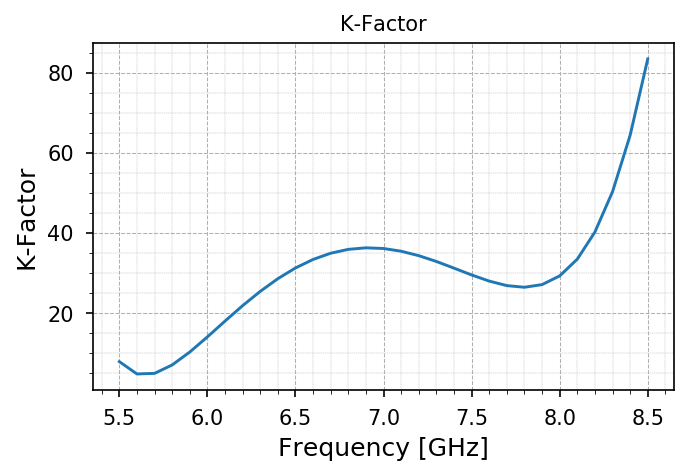

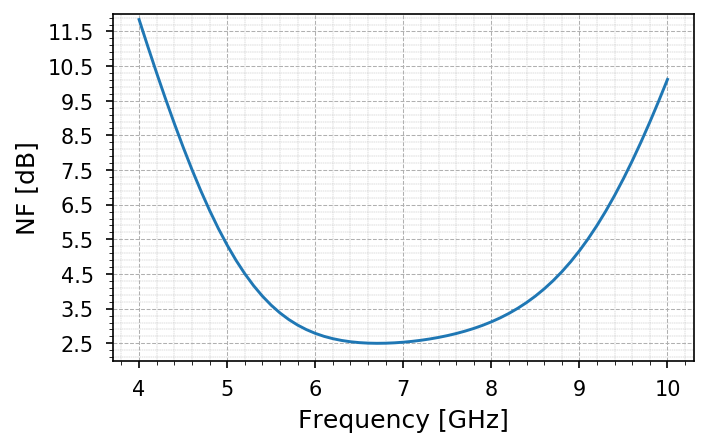

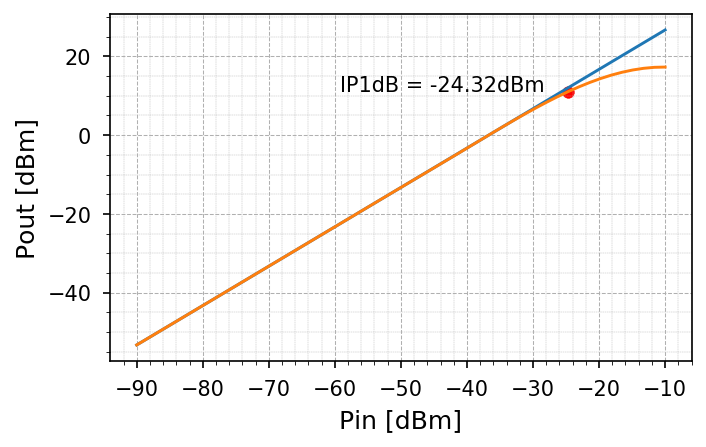

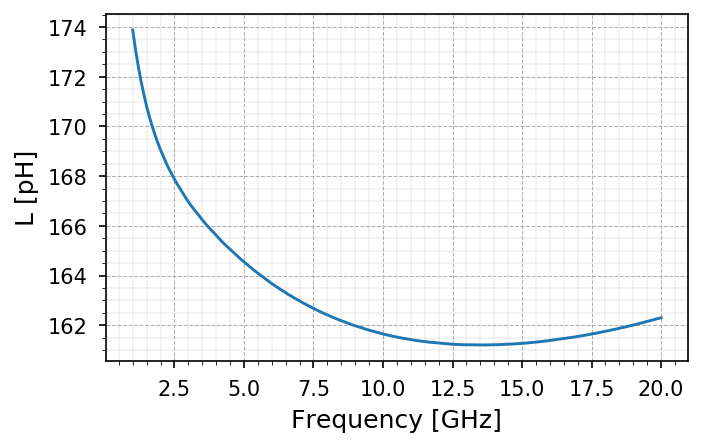

In [48]:
# Plot S11 #########################################################################################################
LNA_stg1 = rf.Network('Data/Cad_sim_data/LNA_RT/LNA_STG1.s2p')
LNA_stg2 = rf.Network('Data/Cad_sim_data/LNA_RT/LNA_STG2_no_Balun.s2p')
LNA_stg_full = rf.Network('Data/Cad_sim_data/LNA_RT/LNA_STG1_STG2.s2p')
LNA_stg_full_4K = rf.Network('Data/Cad_sim_data/LNA_4K/LNA_STG1_STG2_4K.s2p')
LNA_stg_full_ideal_RT = rf.Network('Data/Cad_sim_data/LNA_RT/LNA_STG1_STG2_Ideal_RT.s2p')
LNA_stg_full.plot_s_db(m=0, n=0,  label='S11')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

# Plot gains ######################################################################################################
LNA_stg_full.plot_s_db(m=1,n=0, label='LNA STG2')
LNA_stg1.plot_s_db(m=1, n=0, label='LNA STG1')
# LNA_stg_full_4K.plot_s_db(m=1, n=0)
# LNA_stg_full_ideal_RT.plot_s_db(m=1, n=0)

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

# Interstage Matching #############################################################################################

LNA_stg1.plot_s_smith(m=1,n=1)
LNA_stg2.plot_s_smith(m=0,n=0)
plt.show()


# K-Factor for LNA STG1
plt.plot(LNA_stg_full.frequency.f[15:46]/10**9, LNA_stg_full.stability[15:46])
plt.xlabel('Frequency [GHz]')
plt.ylabel('K-Factor')
plt.title('K-Factor')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


# sp_NF #########################################################################################################
df_LNA_STG1_2 = pd.read_csv('Data/Cad_sim_data/LNA_RT/sp_NF_dB_STG1_STG2.csv',sep=',')
df_LNA_STG1 = pd.read_csv('Data/Cad_sim_data/LNA_RT/sp_NF_dB_STG1_RT.csv',sep=',')
df_LNA_STG1_4K = pd.read_csv('Data/Cad_sim_data/LNA_4K/sp_NF_STG1_dB_4K.csv',sep=',')

plt.plot(df_LNA_STG1_2['sp_NF_dB (par_LNA_STG1_Cin2=0) X']/10**9, df_LNA_STG1_2['sp_NF_dB (par_LNA_STG1_Cin2=0) Y'])
# plt.plot(df_LNA_STG1_4K['sp_NF_dB (Tdiff_R=-294.5) X']/10**9, df_LNA_STG1_4K['sp_NF_dB (Tdiff_R=-294.5) Y'])

# plt.plot(df_LNA_STG1['sp_NF_dB (Tdiff_R=0) X']/10**9, df_LNA_STG1['sp_NF_dB (Tdiff_R=0) Y'])
# plt.plot(df_LNA_STG1_4K['sp_NF_dB (Tdiff_R=-294.5) X']/10**9, df_LNA_STG1_4K['sp_NF_dB (Tdiff_R=-294.5) Y'])


plt.yticks(np.arange(min(df_LNA_STG1_2['sp_NF_dB (par_LNA_STG1_Cin2=0) Y']), max(df_LNA_STG1_2['sp_NF_dB (par_LNA_STG1_Cin2=0) Y'])+1, 1))
plt.xlabel('Frequency [GHz]')
plt.ylabel('NF [dB]')
plt.ylim([2,12])
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()



#Plot p1dB for LNA #################################################################################################
df_pin_sweep = pd.read_csv('Data/Cad_sim_data/LNA_RT/pss_vout_LNA_STG1_STG2_V2.csv',sep=',')
vout_lna_dbm = 10 + 20*np.log10(df_pin_sweep['pss_vout_LNA_Fund (par_LNA_STG1_Cin2=0) Y'])

new_length = 50
new_pin = np.linspace(df_pin_sweep['pss_vout_LNA_Fund (par_LNA_STG1_Cin2=0) X'].min(), df_pin_sweep['pss_vout_LNA_Fund (par_LNA_STG1_Cin2=0) X'].max(), new_length)
new_pout = sp.interpolate.interp1d(df_pin_sweep['pss_vout_LNA_Fund (par_LNA_STG1_Cin2=0) X'], vout_lna_dbm, kind='cubic')(new_pin)


m = (new_pout[10] - new_pout[1]) / (new_pin[10] - new_pin[1])
c = new_pout[10] - new_pin[10]*m

p1db_interpolate = m*new_pin + c
diff_p1db = p1db_interpolate - new_pout

plt.plot(new_pin, p1db_interpolate)
plt.plot(new_pin, new_pout)
plt.scatter(new_pin[40], new_pout[40], color='r')
plt.text(new_pin[40]*(1+1.4), new_pout[40]*(1) , 'IP1dB = -24.32dBm ', fontsize=10)


plt.xlabel('Pin [dBm]')
plt.ylabel('Pout [dBm]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


#Plot Ls Inductor ##################################################################################################
df_Ls = pd.read_csv('Data/Cad_sim_data/LNA_RT/Ls_Inductor.csv',sep=',')

plt.plot(df_Ls['z11_Ls (Tdiff_R=0) X']/10**9, df_Ls['z11_Ls (Tdiff_R=0) Y']*10**12)

plt.xlabel('Frequency [GHz]')
plt.ylabel('L [pH]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


## Mixer - Design

A typical mixer design requires several design compromises. For instance, one can observe that there are conflicting requirements regarding the current of input transistor (High input current for linearity reasons and noise requirement, high gm for low noise) and the size of the load resistor (Which must be carefully selected so that there are enough headroom and a sufficiently high gain). 

Note: High Vgt allows higher gm. This allows higher IP3 as it is proportional to the Vgt. This is logical as higher Vgt allows bigger headroom for the input signal in order for the input transistor to be still in saturation. Input refered noise will be lower too.

The I/Q mixer is designed as a double balance bleeding mixer as it comprises of an additional current source to ensure that lower current will run to through the resistors at the load of the mixer. Doing so allows one to use a bigger resistance for a higher conversion gain. The lowering of the current through the switches will also results a lower overdrive voltage which can help with a more abrupt switching. This lowers the cross-over time which lessens the effect of the noise injection at the zero crossing. 

One of the flaw of this method is that an additional capacitance can be observed at the drain of the input transistor. This provides a low impedance source which steals the current from the input transistor. This in effect will result a slightly lower conversion gain. In this topology, a higher the bleed current allows the mixer to have a higher conversion gain. The drawback of this method is the noise contribution of the additional current source. As more bleed current is used, higher noise contribution will be observed.

Input is set by a 1:1 Balun to transform the differential output of the LNA into a differential I/Q path.

Regarding the specification, it is observed that:
- P1dB = -17 dBm
- IP3 = -10 dBm
- IP2 = 46.13 dBm

Power wise, they require 20mW. 


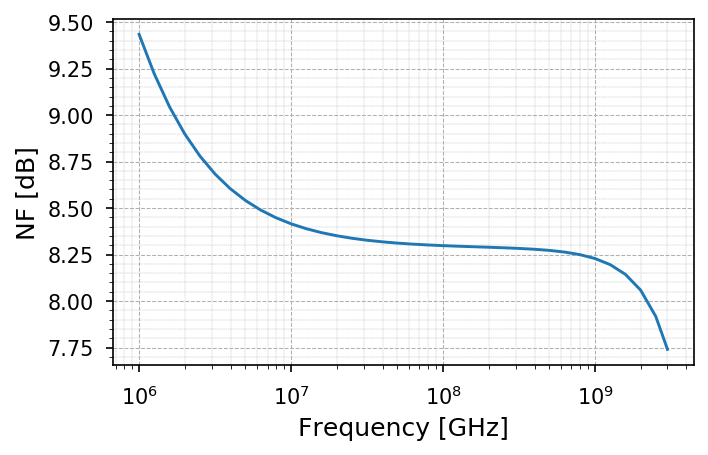

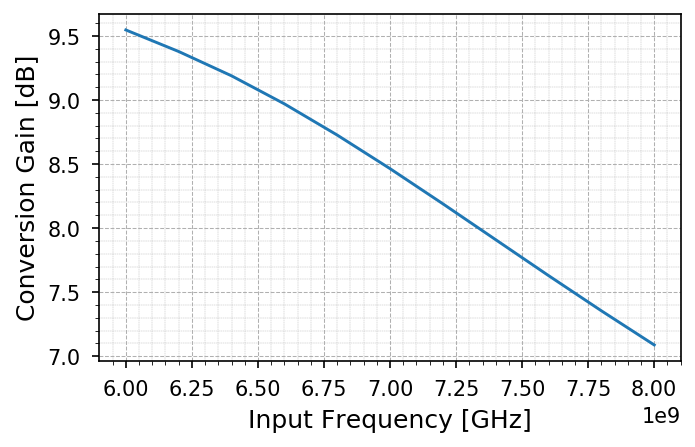

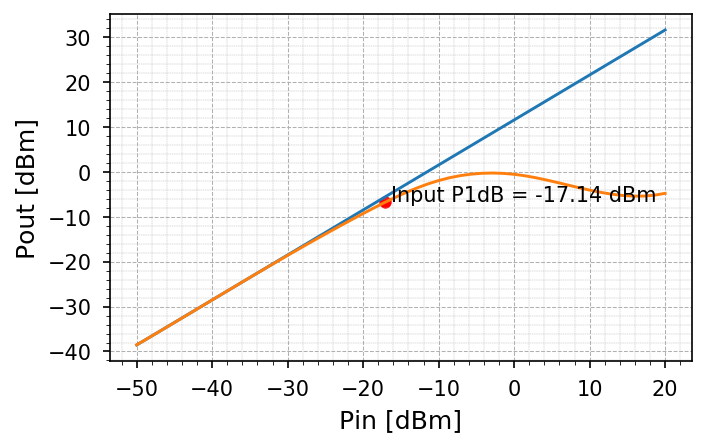

In [52]:
#NF ###############################################################################################

df_NF_Mixer = pd.read_csv('Data/Cad_sim_data/Mixer_RT/pnoise_NF_dB.csv',sep=',')
plt.semilogx(df_NF_Mixer['pnoise_Ndsb (Tdiff_R=0) X'], df_NF_Mixer['pnoise_Ndsb (Tdiff_R=0) Y'])

plt.xlabel('Frequency [GHz]')
plt.ylabel('NF [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


#Conversion Gain ####################################################################################################

df_Mixer_gain = pd.read_csv('Data/Cad_sim_data/Mixer_RT/pxf_gain_dB.csv',sep=',')
plt.plot(df_Mixer_gain['pxf_gain_dB_Hm1 (Tdiff_R=0) X'], df_Mixer_gain['pxf_gain_dB_Hm1 (Tdiff_R=0) Y'])

plt.xlabel('Input Frequency [GHz]')
plt.ylabel('Conversion Gain [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


#Plot p1dB for Mixer #################################################################################################
df_pin_sweep = pd.read_csv('Data/Cad_sim_data/Mixer_RT/qpss_Pout.csv',sep=',')

Vout_mag = np.sqrt(df_pin_sweep['v (/voutm_I /voutp_I) h=-1,1; qpss mag(Vpeak) YRe']**2 +
                  df_pin_sweep['v (/voutm_I /voutp_I) h=-1,1; qpss mag(Vpeak) YReImag']**2)

vout_mixer_dbm = 10 + 20*np.log10(Vout_mag)

new_length = 50
new_pin = np.linspace(df_pin_sweep['v (/voutm_I /voutp_I) h=-1,1; qpss mag(Vpeak) X'].min(), df_pin_sweep['v (/voutm_I /voutp_I) h=-1,1; qpss mag(Vpeak) X'].max(), new_length)
new_pout = sp.interpolate.interp1d(df_pin_sweep['v (/voutm_I /voutp_I) h=-1,1; qpss mag(Vpeak) X'], vout_mixer_dbm, kind='cubic')(new_pin)


m = (new_pout[10] - new_pout[1]) / (new_pin[10] - new_pin[1])
c = new_pout[10] - new_pin[10]*m

p1db_interpolate = m*new_pin + c
diff_p1db = p1db_interpolate - new_pout

plt.plot(new_pin, p1db_interpolate)
plt.plot(new_pin, new_pout)
plt.scatter(new_pin[23], new_pout[23], color='r')
plt.text(new_pin[23]*(1-0.05), new_pout[23]*(1-0.05) , 'Input P1dB = -17.14 dBm ', fontsize=10)


plt.xlabel('Pin [dBm]')
plt.ylabel('Pout [dBm]')
# plt.title('P1dB')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


## IF Buffer Design

An IF amplifier is implemented proceeding the mixer to increase the overal gain of the receiver. A ~15dB increase in gain is added in this case. In this particular receiver, the IF amplifier is simply realized by a cascoded differential amplifier with a resistive load. 

The IF amplifier and the buffer is AC coupled. A bias resistor is used to set up the bias point of the input transistor of the IF buffer differential pair. In principle, the buffer is designed in a way that the DC impedance looking towards into the output node is approximately 50 $\Omega$. This is expressed as:

$$Z_L = (R_L || gmr_or_0) $$





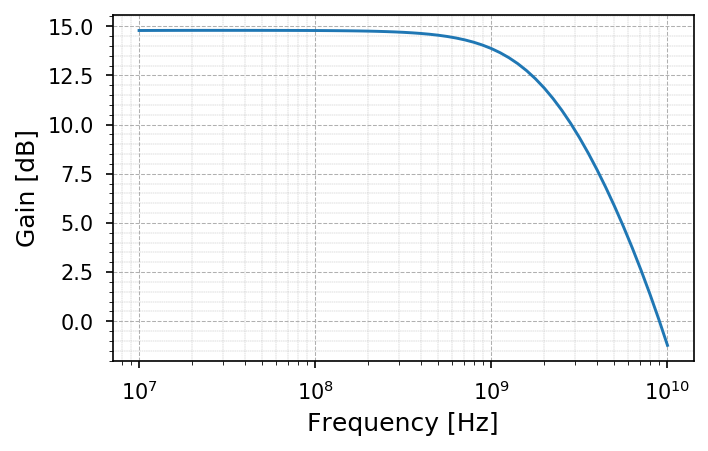

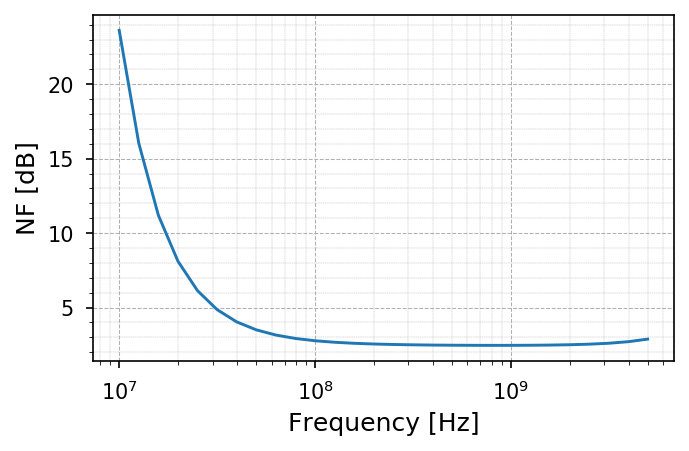

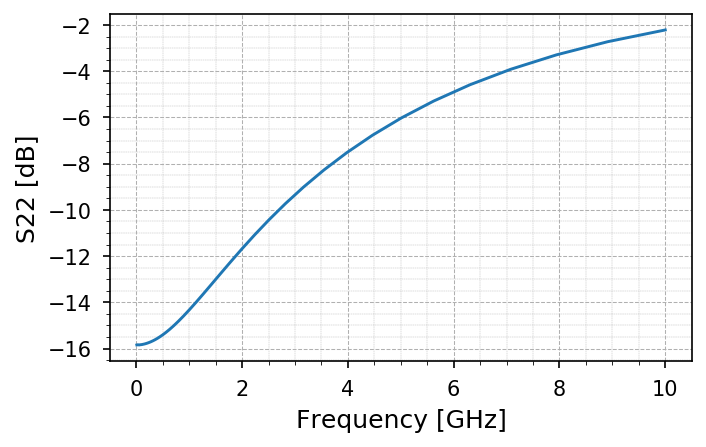

In [50]:
#Plot IF STG1
df_IF_amp = pd.read_csv('Data/Cad_sim_data/IF_AMP_RT/Gain_TF_RT.csv',sep=',')
plt.semilogx(df_IF_amp['ac_vo_diff_I_STG1_dB (Tdiff_R=-288.5) X'], df_IF_amp['ac_vo_diff_I_STG1_dB (Tdiff_R=-288.5) Y'])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

#Plot IF STG1
df_NF_STG1_BUF = pd.read_csv('Data/Cad_sim_data/IF_AMP_RT/NF_STG1_IF_RT.csv',sep=',')
plt.semilogx(df_NF_STG1_BUF['ac_F (Tdiff_R=-288.5) X'], df_NF_STG1_BUF['ac_F (Tdiff_R=-288.5) Y'])

plt.xlabel('Frequency [Hz]')
plt.ylabel('NF [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


#Plot IF STG1
df_S22 = pd.read_csv('Data/Cad_sim_data/IF_AMP_RT/S22_Param.csv',sep=',')
plt.plot(df_S22['sp_s22 (Tdiff_R=-288.5) X']/10**9, df_S22['sp_s22 (Tdiff_R=-288.5) Y'])

plt.xlabel('Frequency [GHz]')
plt.ylabel('S22 [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()



# LNA Self Design


Goal of the design is to achieve 20dB of gain for the first stage with NFmin and impedance matched.

The first step towards making an LNA is to examine the current NFmin. This bias condition that gives the best NF. After doing so, set to that bias. This is for the topology for the common source. 

We then try to examine the behaviour with a degenerative inductor. As usual, we find the gm and the Ls to give us a 50 ohm impedance. We can try to find the Cgs by using the S-parameter plot. Find the S11 of the transistor and we will observe that it will behave capacitively which is essentially the Cgs. We then use the inductive to find the inductor required and the gm required. We set the gm to optimal current density perhaps? If we need more gain, we can always use a bigger transistor to get higher gm. Draw the gain circle perhaps?

- Already plotted the NF for minimum size, maybe it is good to plot the bigger size, such as double that. and triple that and observe the NF for those sizes. Study the behaviour of NF with noise.
- 

The NF plot is normalized to the current density since at first order the NFmin does not scale with the device. A change in width will only shift the NF plot to the right. Hence we normalized the current with the size of the transistor. However, it should be noted that the bigger the device, the bigger the input impedance. 


The optimum noise figure for the NMOS is at 0.000169 A/um.
- dembedding the pcb?

## Notes
- NFmin of longer transistor is higher. NFmin for CMOS is proportional to 1/ft. So longer channel, lower Ft, higher NFmin.
$$F_{CMOS,min} \approx 1 + \frac{f}{f_T}\sqrt{\gamma \delta \zeta (1- |c|^2} $$

## TSMC40 Characteristic

The reference transistor is shown below. The following transistor is in saturation. The design can be scaled from the following parameters based on the length of 40nm.

| Parameter | Value    |
|-------|----------|
| W/L   | 5um/40nm |
| Iref  | 357.34uA |
| Vds   | 0.2V     |
| Vgt   | 0.2V     |
| gm    | 2.743mS  |


| Device   | Param | Inband Integrated Noise $V^2$  (6GHz - 8GHz) | % Of Total |
|----------|-------|----------------------------------------------------|------------|
| /I0/R0   | rn    | 6.88207e-08                                        | 10.32      |
| I0.M7.rg | rn    | 6.37679e-08                                        | 9.56       |
| /I0/M7   | id    | 2.66946e-08                                        | 4.00       |
| /I0/M6   | id    | 1.15667e-08                                        | 1.73       |
| /R0      | rn    | 8.18297e-09                                        | 1.23       |
| /I14/M22 | id    | 5.32252e-09                                        | 0.80       |
| /I14/M21 | id    | 5.32252e-09                                        | 0.80       |
| I0.M7.rb | rn    | 2.61474e-09                                        | 0.39       |
| I0.M7.rb | rn    | 2.61474e-09                                        | 0.39       |
| I0.M6.rg | rn    | 2.46109e-09                                        | 0.37       |

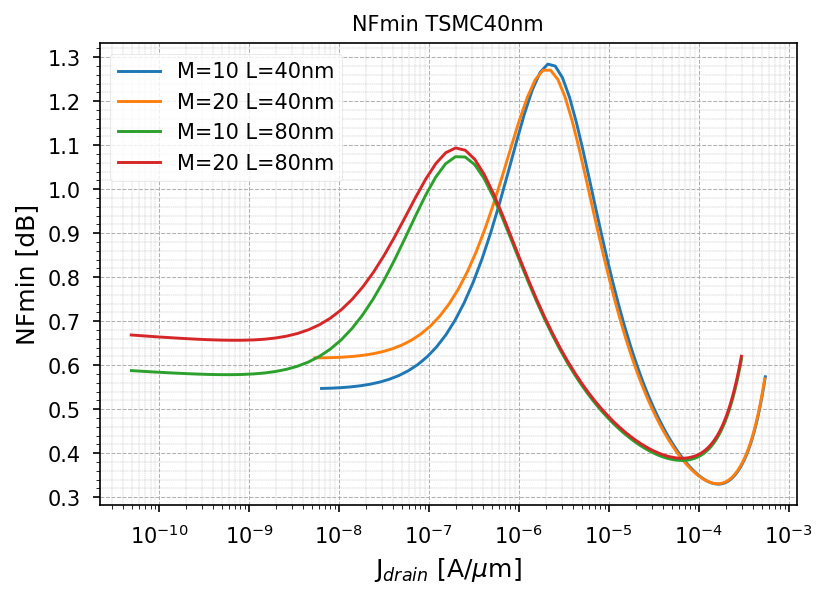

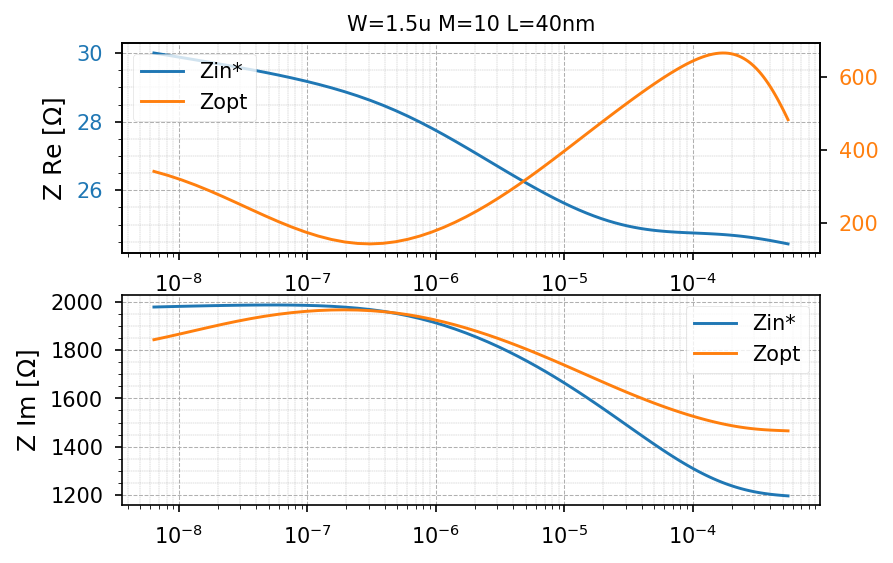

NameError: name 'LNA_stg_full' is not defined

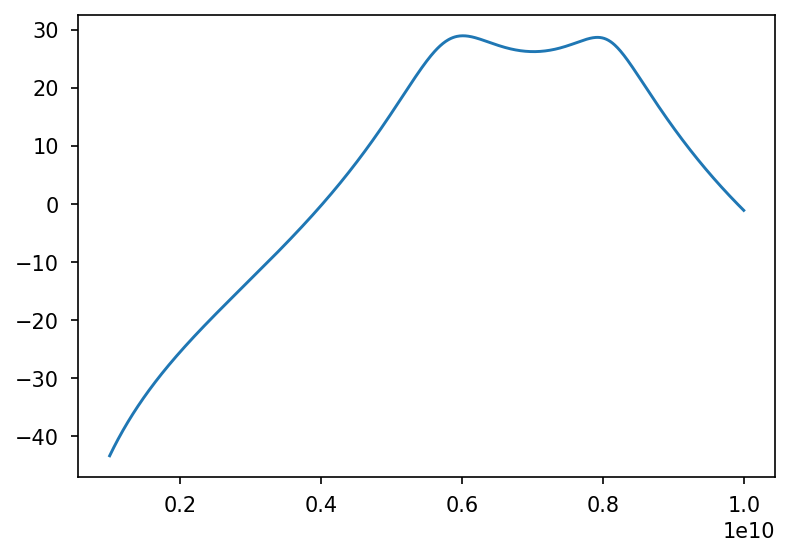

In [19]:
#Plot IF STG1 #########################################################################################################
df_Id_sweep = pd.read_csv('Data/Cad_sim_data/LNA_SelfDesign/Id_sweep.csv',sep=',')
df_NF_min = pd.read_csv('Data/Cad_sim_data/LNA_SelfDesign/NFmin_sweep.csv',sep=',')

df_Id_sweep_80nm = pd.read_csv('Data/Cad_sim_data/LNA_SelfDesign/Id_sweep_L=80nm.csv',sep=',')
df_NF_min_80nm = pd.read_csv('Data/Cad_sim_data/LNA_SelfDesign/NFmin_sweep_L=80nm.csv',sep=',')


w_nmos = 2 # Finger width [um]

# plt.semilogx(df_Id_sweep['/M0/D (M=1) Y']/w_nmos, df_NF_min['NFmin_Bias (M=1) Y'])  # L=40nm
# plt.semilogx(df_Id_sweep_80nm['/M0/D (M=1) Y']/w_nmos, df_NF_min_80nm['NFmin_Bias (M=1) Y']) #L=80nm

plt.semilogx(df_Id_sweep['/M0/D (M=10) Y']/(w_nmos*10), df_NF_min['NFmin_Bias (M=10) Y'], label='M=10 L=40nm')  # L=40nm
plt.semilogx(df_Id_sweep['/M0/D (M=20) Y']/(w_nmos*20), df_NF_min['NFmin_Bias (M=20) Y'], label='M=20 L=40nm') # L=40nm
plt.semilogx(df_Id_sweep_80nm['/M0/D (M=10) Y']/(w_nmos*10), df_NF_min_80nm['NFmin_Bias (M=10) Y'], label='M=10 L=80nm') # L=80nm
plt.semilogx(df_Id_sweep_80nm['/M0/D (M=20) Y']/(w_nmos*20), df_NF_min_80nm['NFmin_Bias (M=20) Y'], label='M=20 L=80nm') # L=80nm


# plt.semilogx(df_Id_sweep['VN2() (M=10) Y'], df_NF_min['NFmin_Bias (M=10) Y']) # The plot is vs Vbias
# plt.semilogx(df_Id_sweep['VN2() (M=20) Y'], df_NF_min['NFmin_Bias (M=20) Y']) # The plot is vs Vbias

plt.xlabel('J$_{drain}$ [A/$\mu$m]')
plt.ylabel('NFmin [dB]')
plt.legend()
plt.title('NFmin TSMC40nm')
plt.yticks(np.arange(0.3, 1.4, 0.1)) 
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


## Z Match and Zopt ###############################################################################################
df_Id_axis = pd.read_csv('Data/Cad_sim_data/MOS_Char/Impedance_Matching/Idrain.csv',sep=',')

df_Re_Zin = pd.read_csv('Data/Cad_sim_data/MOS_Char_Yopt_Zopt/Zin_Re.csv',sep=',')
df_Im_Zin = pd.read_csv('Data/Cad_sim_data/MOS_Char_Yopt_Zopt/Zin_Im.csv',sep=',')
df_Re_Zopt = pd.read_csv('Data/Cad_sim_data/MOS_Char_Yopt_Zopt/Zopt_Re.csv',sep=',')
df_Im_Zopt = pd.read_csv('Data/Cad_sim_data/MOS_Char_Yopt_Zopt/Zopt_Im.csv',sep=',')


fig, (ax1, ax2) = plt.subplots(2,1)
ax1.semilogx(df_Id_sweep['/M0/D (M=10) Y']/(w_nmos*10), df_Re_Zin['Zin_Re (L=4e-08,M=10) Y'], label='Zin*')
ax3 = ax1.twinx()
ax3.semilogx(df_Id_sweep['/M0/D (M=10) Y']/(w_nmos*10), df_Re_Zopt['Zopt_Re (L=4e-08,M=10) Y'], label='Zopt', color='C1')



ax1.set_ylabel('Z Re [$\Omega$]')
ax1.minorticks_on()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax3.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.grid(which='major', linestyle='--', linewidth=0.5)
ax1.grid(which='minor', linestyle='--', linewidth=0.2)
ax1.tick_params(axis='y', labelcolor='C0')
ax3.tick_params(axis='y', labelcolor='C1')


ax2.semilogx(df_Id_sweep['/M0/D (M=10) Y']/(w_nmos*10), df_Im_Zin['Zin_Im (L=4e-08,M=10) Y']*(-1), label='Zin*')
ax2.semilogx(df_Id_sweep['/M0/D (M=10) Y']/(w_nmos*10), df_Im_Zopt['Zopt_Im (L=4e-08,M=10) Y'], label='Zopt') 

ax2.set_ylabel('Z Im [$\Omega$]')
ax2.legend()
ax2.minorticks_on()

plt.xlabel('J$_{drain}$ [A/$\mu$m]')


ax2.grid(which='major', linestyle='--', linewidth=0.5)
ax2.grid(which='minor', linestyle='--', linewidth=0.2)
plt.title('W=1.5u M=10 L=40nm')
plt.show()


#Plot S21 both stages #################################################################################################

df_S21_LNA_ver2 = pd.read_csv('Data/Cad_sim_data/LNA_SelfDesign_ver3/S21_LNA.csv',sep=',')

plt.plot(df_S21_LNA_ver2['S21 dB20 (K_in=0.325) X'], df_S21_LNA_ver2['S21 dB20 (K_in=0.325) Y'])
LNA_stg_full.plot_s_db(m=1,n=0)


plt.xlabel('Frequency [GHz]')
plt.ylabel('S21 [dB]')
plt.minorticks_on()
plt.xlim(4*10**9,10*10**9)
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

#Plot S11 both stages ##################################################################################################
df_S11_LNA_self = pd.read_csv('Data/Cad_sim_data/LNA_SelfDesign_ver3/S11_LNA.csv',sep=',')

plt.plot(df_S11_LNA_self['S11 dB20 (Ccomp=3e-14) X'], df_S11_LNA_self['S11 dB20 (Ccomp=3e-14) Y'])
LNA_stg_full.plot_s_db(m=0,n=0)

plt.xlabel('Frequency [GHz]')
plt.ylabel('S11 [dB]')
plt.minorticks_on()
plt.xlim(4*10**9,10*10**9)
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

#Plot NF both stages ####################################################################################################
df_NF_LNA_self = pd.read_csv('Data/Cad_sim_data/LNA_SelfDesign_ver2/NF_LNA_fullstg.csv',sep=',')

plt.plot(df_NF_LNA_self['NF dB10 (L_stg2_Sec=5e-09) X']/10**9, df_NF_LNA_self['NF dB10 (L_stg2_Sec=5e-09) Y'])
plt.plot(df_LNA_STG1_2['sp_NF_dB (par_LNA_STG1_Cin2=0) X']/10**9, df_LNA_STG1_2['sp_NF_dB (par_LNA_STG1_Cin2=0) Y'])

plt.xlabel('Frequency [GHz]')
plt.ylabel('NF [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

#Interstage Matching ####################################################################################################

# LNA_stg1_self = rf.Network('Data/Cad_sim_data/LNA_SelfDesign/sp_stg1.s2p')
# LNA_stg2_self = rf.Network('Data/Cad_sim_data/LNA_SelfDesign/sp_stg2.s2p')
# LNA_stg1_self.plot_s_smith(m=1,n=1)
# LNA_stg2_self.plot_s_smith(m=0,n=0)
# plt.show()

#Gain Plot ####################################################################################################

# df_S21_logsweep = pd.read_csv('Data/Cad_sim_data/LNA_SelfDesign/s21_log_sweep_stg1_stg2.csv',sep=',')

# plt.semilogx(df_S21_logsweep['s21 (Lg=8.3e-09) X'], df_S21_logsweep['s21 (Lg=8.3e-09) Y'])


# plt.xlabel('Frequency [GHz]')
# plt.ylabel('S21 [dB]')
# plt.minorticks_on()
# plt.grid(which='major', linestyle='--', linewidth=0.5)
# plt.grid(which='minor', linestyle='--', linewidth=0.2)
# plt.show()










# LNA 

The LNA procedure is similar to those design earlier. At first, the NFmin of the transistors is examined with respect to the biasing. This allows designer to bias the transistor properly to get the minimum noise figure from the transistors.

When this is decided, the designer can proceed to add the source inductor for noise matching and power matching purposes. An optimization here is needed to see whether there is sufficient gain provided by the LNA as being in the lowest NF tends to give the lowest gain. As the


Another tradeoff that's observed is for the sizing of the gate inductance for the matching. To get a lower inductance value, a bigger capacitance value should be presented at the input. In the case where additional capacitance is placed on the gate source and gate drain, noise from the current source can be injected easily in comparison to a lower Cgs and Cgd capacitance. This injected noise is then becomes a voltage due to the 




# Transformer Bandwidth Enhancement

The transformer bandwidth enhancement is an essential part of the LNA design. As the LNA requires to operate at a large bandwidth, a transformer is used to match one stage to the next. 

Several transformer bandwidth enhancement techniques have been demonstrated throughout the years. For this instance, the system comprises of two resonant tanks which are magnetically coupled. Others methods also have shown that it is also possible by capacitively/inductively coupled them. But it has been shown by that a magnetically coupled resonant tanks perform better than the other means of coupling.

Qualitatively, the two resonant tanks resonates at 2 frequencies close to each other. Together, this increases the bandwidth of the system. When the secondary side of the transformer is resonating, the load seen is simple the Resistor at that side in parallel with the impedance of the resonant tank on the left. The other also holds true, when the primary side of the transformer resonantes. Along with the impedance presented from the coupled resonator, the impedance shown is essentially the tank impedance in parallel with the impedance of the input. The system in general has 2 complex poles and a zero at DC. This gives the transfer function inherently a 20dB/dec slope at frequencies before the resonant frequency and 60dB/dec slope at frequencies higher than the designed resonant frequency (Due to the overlapping 2nd order poles from the two resonant tank).

The design procedure is based upon the works of Marco Vigilante. A generic procedure involves finding the input/output capacitance each side of the transformer and finding the corresponding inductor value to resonate along with it. The main constraint of this design dictates that $L_1C_1 = L_2C_2$ (LC product is the same hence resonates at the same freuency). The K factor is dictated by the desired bandwidth of the LNA. The transfer function is 

$$\omega_H = \frac{1}{\sqrt{L_1(1+|k_m|)C_1}} $$

The tradeoff involves whether if you want better matching or higher bandwidth. This is shown in the smith chart. The loop close to the 50 ohm reference inherently shows the bandwidth of the matching. The bigger the loop, the higher the bandwidth at a cost of going further away from the 50 ohm matching point.


# Mixer Self-Design

Find the vout of the mixer. Find the budgeting of the Vds of the mixer. The input transformer as usual should resonate with the rest of the stray capacitance to enhance the bandwidth. 

Find the gain of the system (so 10dB) so you could find the current required or the gm --> find the vds budget --> Size up the transistors accordingly --> 



No handles with labels found to put in legend.


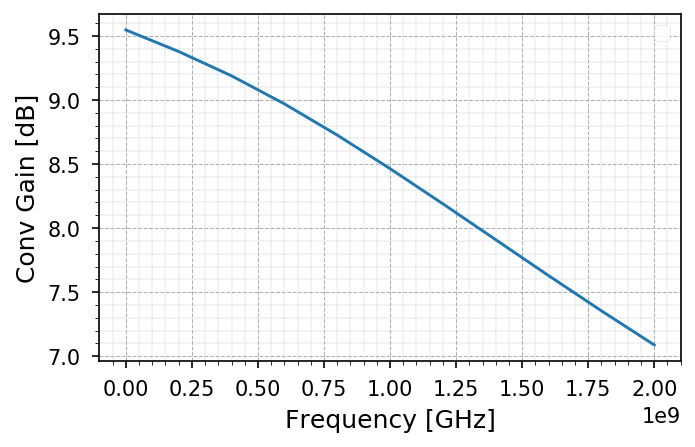

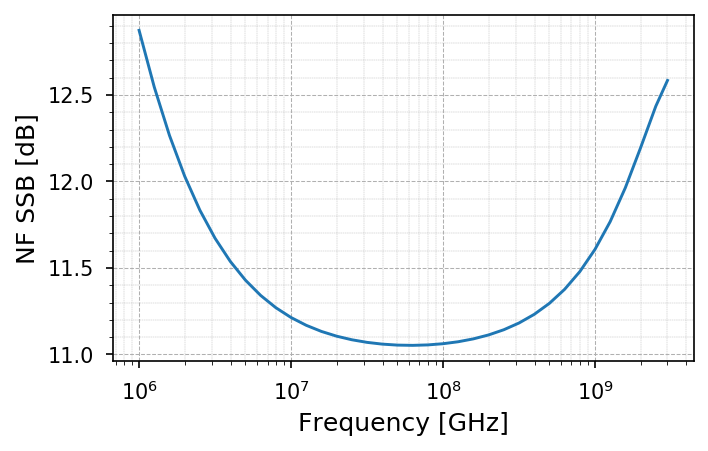

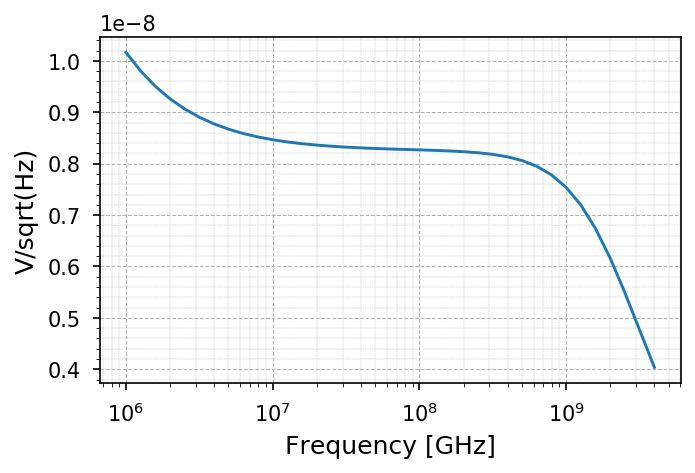

    qpss_conv_gain (fin1=7e+09) X  qpss_conv_gain (fin1=7e+09) Y
0                             -70                      10.123225
1                             -65                      10.123270
2                             -60                      10.123196
3                             -55                      10.122962
4                             -50                      10.122217
5                             -45                      10.119680
6                             -40                      10.112324
7                             -35                      10.089343
8                             -30                      10.017827
9                             -25                       9.775706
10                            -20                       8.987950
11                            -15                       6.614929
12                            -10                       1.555411
13                             -5                      -4.970032
14                       

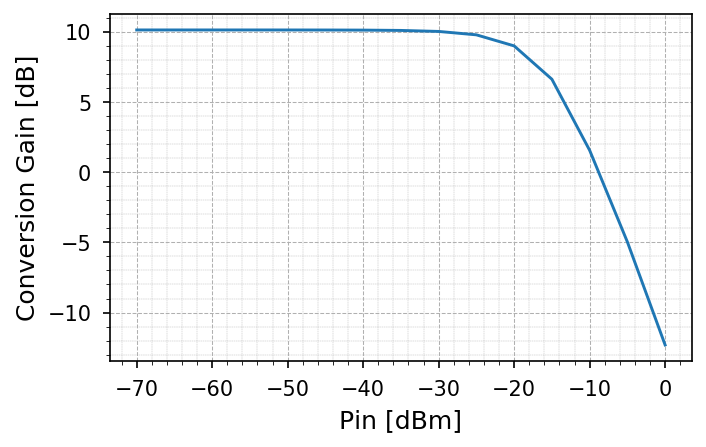

In [51]:
#Conversion Gain ####################################################################################################
df_ConvGain = pd.read_csv('Data/Cad_sim_data/Mixer_selfdesign/Mixer_ConvGain_freq_V2.csv',sep=',')


# plt.plot(df_ConvGain['Conv_Gain_freq (fin1=7e+09) X'], df_ConvGain['Conv_Gain_freq (fin1=7e+09) Y'], label='Self')
plt.plot(df_Mixer_gain['pxf_gain_dB_Hm1 (Tdiff_R=0) X']-6*10**9, df_Mixer_gain['pxf_gain_dB_Hm1 (Tdiff_R=0) Y'])


plt.xlabel('Frequency [GHz]')
plt.ylabel('Conv Gain [dB]')
plt.minorticks_on()
plt.legend()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()



#Pnoise SSB ####################################################################################################
df_NF_SSB = pd.read_csv('Data/Cad_sim_data/Mixer_selfdesign/pnoise_NF_V2.csv',sep=',')
df_NF_SSB_milad = pd.read_csv('Data/Cad_sim_data/Mixer_RT/pnoise_NF_SSBdB.csv',sep=',')


# plt.semilogx(df_NF_SSB['NF_SSB_dB (fin1=7e+09) X'], df_NF_SSB['NF_SSB_dB (fin1=7e+09) Y'], label='Self')
plt.semilogx(df_NF_SSB_milad['noise figure X'], df_NF_SSB_milad['noise figure Y'])


plt.xlabel('Frequency [GHz]')
plt.ylabel('NF SSB [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()



#pnoise_output ####################################################################################################

df_pnoise_out = pd.read_csv('Data/Cad_sim_data/Mixer_selfdesign/pnoise_output.csv',sep=',')


plt.semilogx(df_pnoise_out['output noise; V/sqrt(Hz) X'], df_pnoise_out['output noise; V/sqrt(Hz) Y'])

plt.xlabel('Frequency [GHz]')
plt.ylabel('V/sqrt(Hz)')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

#Linearity ####################################################################################################
df_linearity_Mixer = pd.read_csv('Data/Cad_sim_data/Mixer_selfdesign/Mixer_ConvGain_linearity_V2.csv',sep=',')
print(df_linearity_Mixer)

plt.plot(df_linearity_Mixer['qpss_conv_gain (fin1=7e+09) X'], df_linearity_Mixer['qpss_conv_gain (fin1=7e+09) Y'])

plt.xlabel('Pin [dBm]')
plt.ylabel('Conversion Gain [dB]')
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()



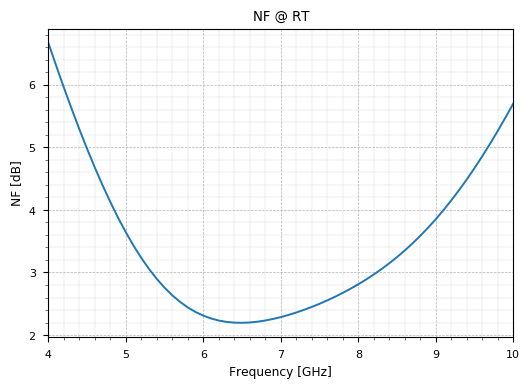

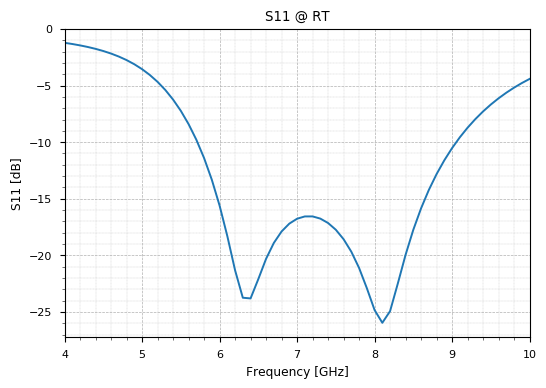

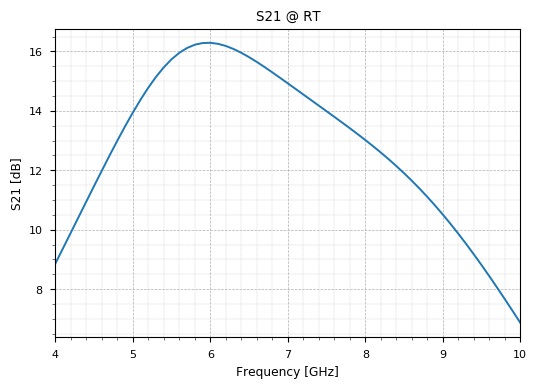

In [43]:
df_NF_LNA_std = pd.read_csv('Data/Cad_sim_data/LNA_standalone/sp_NF_dB.csv',sep=',')

plt.plot(df_NF_LNA_std['sp_NF_dB (Tdiff_R=0) X']/10**9, df_NF_LNA_std['sp_NF_dB (Tdiff_R=0) Y'])

plt.title('NF @ RT')
plt.xlabel('Frequency [GHz]')
plt.ylabel('NF [dB]')
plt.minorticks_on()
plt.xlim(4,10)
# plt.legend()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

###

df_s11_LNA_std = pd.read_csv('Data/Cad_sim_data/LNA_standalone/sp_s11.csv',sep=',')


plt.plot(df_s11_LNA_std['sp_S11_dB (Tdiff_R=0) X']/10**9, df_s11_LNA_std['sp_S11_dB (Tdiff_R=0) Y'])

plt.title('S11 @ RT')
plt.xlabel('Frequency [GHz]')
plt.ylabel('S11 [dB]')
plt.minorticks_on()
plt.xlim(4,10)
# plt.legend()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()

###
df_s21_LNA_std = pd.read_csv('Data/Cad_sim_data/LNA_standalone/sp_s21.csv',sep=',')


plt.plot(df_s21_LNA_std['sp_S21_dB (Tdiff_R=0) X']/10**9, df_s21_LNA_std['sp_S21_dB (Tdiff_R=0) Y'])

plt.title('S21 @ RT')
plt.xlabel('Frequency [GHz]')
plt.ylabel('S21 [dB]')
plt.minorticks_on()
plt.xlim(4,10)
# plt.legend()
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.show()


\frac{V_{out}}{I_{in}} = \frac{kR_sR_L\sqrt{L_1L_2}s}{L_1L_2C_1C_2R_sR_L(1-k^2)s^4 + L_1L_2(C_1R_s+C_2R_L)(1-k^2)s^3 + [(L_1C_1+L_2C_2)R_sR_L+L_1L_2(1-k^2)]s^2 + (L_2R_s+L_1R_L)s + R_sR_L}

| Device | Param | Noise Contribution | % of total |
|--------|-------|--------------------|------------|
| /M2    | id    | 6.60727e-08        | 18.89      |
| /M7    | id    | 6.60727e-08        | 18.89      |
| /M3    | id    | 2.60021e-08        | 7.44       |
| /M9    | id    | 2.60021e-08        | 7.44       |
| /M0    | id    | 1.18217e-08        | 3.38       |
| /M6    | id    | 1.18217e-08        | 3.38       |
| /M1    | id    | 1.18217e-08        | 3.38       |
| /M4    | id    | 1.18217e-08        | 3.38       |
| /R0    | rn    | 7.97095e-09        | 2.28       |
| /R1    | rn    | 7.97095e-09        | 2.28       |